<a href="https://colab.research.google.com/github/wisesprout/dl-selfie-filter/blob/main/CodestatesProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GET DATA

In [1]:
import io
import cv2
import PIL
import html
import time
import numpy as np
import pandas as pd
from PIL import Image
from skimage.io import imshow
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from matplotlib.patches import Circle
from base64 import b64decode, b64encode
from google.colab.output import eval_js
from keras.models import Sequential, Model
from keras.layers import Conv2D,Dropout,Dense,Flatten
from IPython.display import display, Javascript, Image
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from google.colab.patches import cv2_imshow

In [2]:
# get data from kaggle
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c facial-keypoints-detection

Saving kaggle.json to kaggle.json
ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                   Wine Quality Dataset                               21KB  2022-01-15 19:15:11           6921  
prasertk/netflix-subscription-price-in-different-countries     Netflix subscription fee in different countries     3KB  2022-01-15 07:06:09           5270  
prasertk/the-best-cities-for-a-workation                       The Best Cities for a Workation                     6KB  2022-02-16 11:46:28            580  
majyhain/height-of-male-and-female-by-country-2022             Height of Male and Female by Country 2022           4KB  2022-02-02 00:40:19           2541  
sanjeetsinghnaik/top-100

In [3]:
# unzip zipped files
! unzip test.zip
! unzip training.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [4]:
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')

In [5]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [6]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


# PREPROCESSING DATA

In [7]:
# 1. train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [8]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [9]:
# KAGGLE GOLD
# fill missing values with the previous values in that row
train.fillna(method='ffill', inplace=True)

In [10]:
train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [11]:
# split feature=img/target=coordinates values
train_img = train['Image'].apply(lambda x: np.fromstring(x, sep=' '))
train_img = np.vstack(train_img.values)/255  # normalize => scale pixel values to [0,1]
train_img = train_img.astype(np.float32)
X_train = train_img.reshape(-1, 96, 96, 1)  # return each images as 96*96*1
X_train

array([[[[0.93333334],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333334],
         [0.9254902 ],
         ...,
         [0.9764706 ],
         [0.98039216],
         [0.9843137 ]],

        [[0.92941177],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.98039216]],

        ...,

        [[0.7294118 ],
         [0.7176471 ],
         [0.70980394],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.7411765 ],
         [0.7372549 ],
         [0.8117647 ],
         ...,
         [0.23921569],
         [0.27058825],
         [0.30588236]],

        [[0.7490196 ],
         [0.72156864],
         [0.72156864],
         ...,
         [0.27450982],
         [0.29411766],
         [0.3529412 ]]],


       [[[0.85882354],
         [0.84313726],
         [0.8 

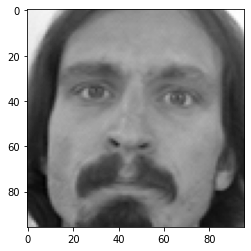

In [12]:
# show first image
plt.imshow(X_train[0].reshape(96,96), cmap='gray')

In [13]:
y_train = train[train.columns[:-1]].values
y_train = (y_train-48)/48
y_train = y_train.astype(np.float32)
y_train

array([[ 0.37569925, -0.18745263, -0.37027067, ...,  0.5194887 ,
        -0.10144361,  0.7601203 ],
       [ 0.3402695 , -0.27145675, -0.37605673, ...,  0.46388653,
        -0.05275177,  0.7808369 ],
       [ 0.35535526, -0.27271578, -0.35617104, ...,  0.46232894,
        -0.01510526,  0.63873684],
       ...,
       [ 0.38939023, -0.23239122, -0.34028292, ...,  0.58257484,
         0.03047024,  0.62744   ],
       [ 0.4784392 , -0.1697153 , -0.36368155, ...,  0.58257484,
         0.04302471,  0.65805095],
       [ 0.39454815, -0.09532271, -0.35216543, ...,  0.58257484,
        -0.04374   ,  0.7244395 ]], dtype=float32)

In [14]:
X_train.shape, y_train.shape

((7049, 96, 96, 1), (7049, 30))

In [15]:
# function to plot facial keypoints on images
def visualize_points(img, points):
    img = img.reshape(96,96)
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    imshow(img)
    for i in range(0, len(points),2):
        x_renorm = (points[i]*48)+48  # Denormalize x-coordinate
        y_renorm = (points[i+1]*48)+48  # Denormalize y-coordinate
        circle = Circle((x_renorm, y_renorm), 1, color='r')  # Plot the keypoints at the x, y coordinates
        ax.add_patch(circle)
    plt.show()

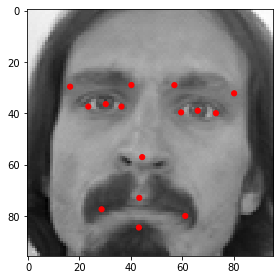

In [16]:
visualize_points(X_train[0], y_train[0])

In [17]:
# test data
# use index as image id
test.drop('ImageId', axis=1, inplace=True)
test.head()

,Image
0,182 183 182 182 180 180 176 169 156 137 124 10...
1,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,177 176 174 170 169 169 168 166 166 166 161 14...
3,176 174 174 175 174 174 176 176 175 171 165 15...
4,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [18]:
X_test = test['Image'].apply(lambda x: np.fromstring(x, sep=' '))
X_test = np.vstack(X_test.values)/255  # normalize => scale pixel values to [0,1]
X_test = X_test.astype(np.float32)
X_test = X_test.reshape(-1, 96, 96, 1)  # return each images as 96*96*1
X_test

array([[[[0.7137255 ],
         [0.7176471 ],
         [0.7137255 ],
         ...,
         [0.7137255 ],
         [0.7137255 ],
         [0.7137255 ]],

        [[0.7137255 ],
         [0.70980394],
         [0.70980394],
         ...,
         [0.7137255 ],
         [0.7137255 ],
         [0.7137255 ]],

        [[0.7137255 ],
         [0.70980394],
         [0.7058824 ],
         ...,
         [0.7137255 ],
         [0.70980394],
         [0.7137255 ]],

        ...,

        [[0.16470589],
         [0.14117648],
         [0.07843138],
         ...,
         [0.49411765],
         [0.53333336],
         [0.6       ]],

        [[0.12156863],
         [0.03137255],
         [0.        ],
         ...,
         [0.03529412],
         [0.04313726],
         [0.12941177]],

        [[0.01176471],
         [0.        ],
         [0.00392157],
         ...,
         [0.03137255],
         [0.01960784],
         [0.01960784]]],


       [[[0.29803923],
         [0.34117648],
         [0.31

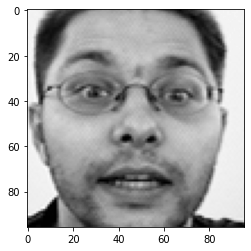

In [19]:
# view first test image
plt.imshow(X_test[0].reshape(96,96), cmap='gray')
plt.show()

# BUILD MODEL

In [23]:
model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                      

In [24]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

# FIT MODEL

In [25]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 30s 597ms/step - loss: 1.0947 - mae: 0.4885 - val_loss: 0.1065 - val_mae: 0.2795
Epoch 2/50
23/23 [==============================] - 11s 484ms/step - loss: 0.0280 - mae: 0.1271 - val_loss: 0.0563 - val_mae: 0.2041
Epoch 3/50
23/23 [==============================] - 11s 488ms/step - loss: 0.0171 - mae: 0.0980 - val_loss: 0.0359 - val_mae: 0.1635
Epoch 4/50
23/23 [==============================] - 11s 485ms/step - loss: 0.0125 - mae: 0.0822 - val_loss: 0.0389 - val_mae: 0.1675
Epoch 5/50
23/23 [==============================] - 11s 485ms/step - loss: 0.0143 - mae: 0.0889 - val_loss: 0.0210 - val_mae: 0.1197
Epoch 6/50
23/23 [==============================] - 11s 486ms/step - loss: 0.0111 - mae: 0.0771 - val_loss: 0.0175 - val_mae: 0.1092
Epoch 7/50
23/23 [==============================] - 11s 486ms/step - loss: 0.0109 - mae: 0.0766 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 8/50
23/23 [==============================] - 11s 486ms/step - 

### Model without LeakyReLU

In [29]:
def model2():
    model = Sequential([Flatten(input_shape=(96,96)),
                            Dense(128, activation="relu"),
                            Dropout(0.1),
                            Dense(64, activation="relu"),
                            Dense(30)
                            ])
    model = Sequential()

    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
    model.add(BatchNormalization())

    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())

    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())

    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    # model.add(BatchNormalization())
    model.add(BatchNormalization())

    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(BatchNormalization())

    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())

    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(BatchNormalization())


    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30))
    model.summary()
    return model

model2 = model2()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 96, 96, 32)        288       
                                                                 
 batch_normalization_12 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 32)        9216      
                                                                 
 batch_normalization_13 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                      

In [30]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [42]:
result2 = model2.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 10s 453ms/step - loss: 0.0048 - mae: 0.0447 - val_loss: 0.0028 - val_mae: 0.0343
Epoch 2/50
23/23 [==============================] - 10s 452ms/step - loss: 0.0048 - mae: 0.0450 - val_loss: 0.0026 - val_mae: 0.0319
Epoch 3/50
23/23 [==============================] - 10s 445ms/step - loss: 0.0047 - mae: 0.0442 - val_loss: 0.0025 - val_mae: 0.0316
Epoch 4/50
23/23 [==============================] - 10s 448ms/step - loss: 0.0047 - mae: 0.0442 - val_loss: 0.0025 - val_mae: 0.0304
Epoch 5/50
23/23 [==============================] - 10s 445ms/step - loss: 0.0046 - mae: 0.0438 - val_loss: 0.0024 - val_mae: 0.0295
Epoch 6/50
23/23 [==============================] - 10s 444ms/step - loss: 0.0046 - mae: 0.0438 - val_loss: 0.0025 - val_mae: 0.0311
Epoch 7/50
23/23 [==============================] - 10s 441ms/step - loss: 0.0046 - mae: 0.0438 - val_loss: 0.0025 - val_mae: 0.0308
Epoch 8/50
23/23 [==============================] - 10s 437ms/step - 

In [37]:
def model3():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(96,96,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(30))

    return model;

In [39]:
model3 = model3()
model3.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [44]:
result3 = model3.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 3s 149ms/step - loss: 0.0024 - mae: 0.0308 - val_loss: 0.0015 - val_mae: 0.0214
Epoch 2/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0024 - mae: 0.0303 - val_loss: 0.0015 - val_mae: 0.0221
Epoch 3/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0023 - mae: 0.0301 - val_loss: 0.0015 - val_mae: 0.0222
Epoch 4/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0023 - mae: 0.0301 - val_loss: 0.0014 - val_mae: 0.0215
Epoch 5/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0022 - mae: 0.0289 - val_loss: 0.0018 - val_mae: 0.0256
Epoch 6/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0022 - mae: 0.0297 - val_loss: 0.0015 - val_mae: 0.0218
Epoch 7/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0021 - mae: 0.0285 - val_loss: 0.0014 - val_mae: 0.0215
Epoch 8/50
23/23 [==============================] - 3s 136ms/step - loss: 0.

In [50]:
# model3 + batch normalization
def model4():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(96,96,1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(30, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(30))

    return model;

In [51]:
model4 = model4()
model4.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [52]:
result4 = model4.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 8s 236ms/step - loss: 0.0892 - mae: 0.2004 - val_loss: 0.0600 - val_mae: 0.2076
Epoch 2/50
23/23 [==============================] - 4s 164ms/step - loss: 0.0116 - mae: 0.0812 - val_loss: 0.0118 - val_mae: 0.0863
Epoch 3/50
23/23 [==============================] - 4s 165ms/step - loss: 0.0084 - mae: 0.0677 - val_loss: 0.0180 - val_mae: 0.1085
Epoch 4/50
23/23 [==============================] - 4s 165ms/step - loss: 0.0072 - mae: 0.0617 - val_loss: 0.0410 - val_mae: 0.1626
Epoch 5/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0065 - mae: 0.0579 - val_loss: 0.0475 - val_mae: 0.1766
Epoch 6/50
23/23 [==============================] - 4s 165ms/step - loss: 0.0060 - mae: 0.0556 - val_loss: 0.0484 - val_mae: 0.1778
Epoch 7/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0061 - mae: 0.0556 - val_loss: 0.0454 - val_mae: 0.1722
Epoch 8/50
23/23 [==============================] - 4s 166ms/step - loss: 0.

In [53]:
# model4 - dropout
def model5():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(96,96,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(30))

    return model;

In [54]:
model5 = model5()
model5.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [55]:
result5 = model5.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 6s 164ms/step - loss: 0.0561 - mae: 0.1833 - val_loss: 0.0186 - val_mae: 0.1069
Epoch 2/50
23/23 [==============================] - 3s 139ms/step - loss: 0.0091 - mae: 0.0701 - val_loss: 0.0076 - val_mae: 0.0677
Epoch 3/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0058 - mae: 0.0532 - val_loss: 0.0063 - val_mae: 0.0603
Epoch 4/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0050 - mae: 0.0477 - val_loss: 0.0083 - val_mae: 0.0733
Epoch 5/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0048 - mae: 0.0462 - val_loss: 0.0066 - val_mae: 0.0632
Epoch 6/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0046 - mae: 0.0452 - val_loss: 0.0088 - val_mae: 0.0751
Epoch 7/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0047 - mae: 0.0454 - val_loss: 0.0064 - val_mae: 0.0615
Epoch 8/50
23/23 [==============================] - 3s 136ms/step - loss: 0.

# TEST MODEL

In [26]:
pred = model.predict(X_test)

<Figure size 1440x1152 with 0 Axes>

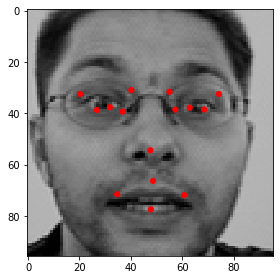

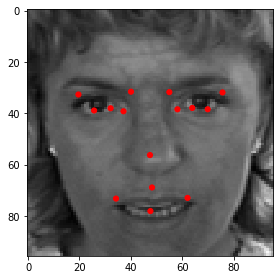

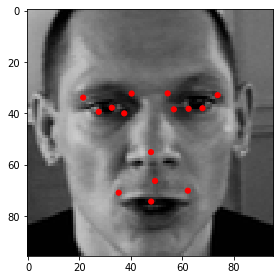

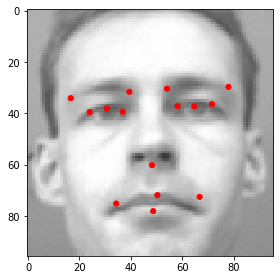

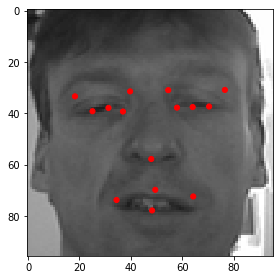

In [27]:
fig = plt.figure(figsize=(20,16))
for i in range(5):
    visualize_points(X_test[i], pred[i])
plt.show()

<Figure size 1440x1152 with 0 Axes>

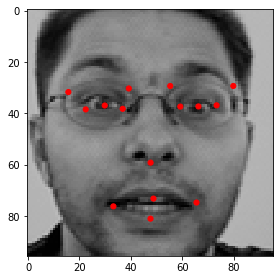

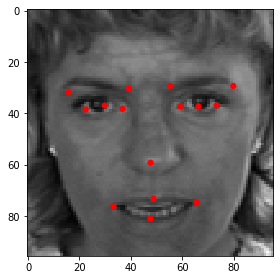

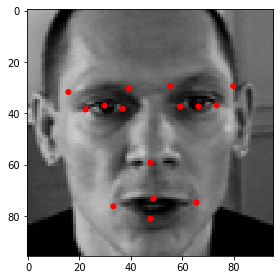

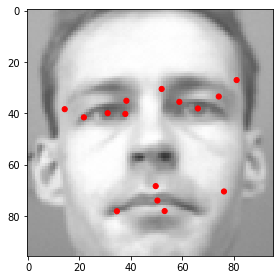

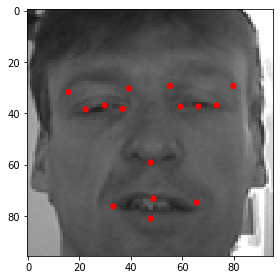

In [45]:
pred2 = model2.predict(X_test)
fig = plt.figure(figsize=(20,16))
for i in range(5):
    visualize_points(X_test[i], pred2[i])
plt.show()

<Figure size 1440x1152 with 0 Axes>

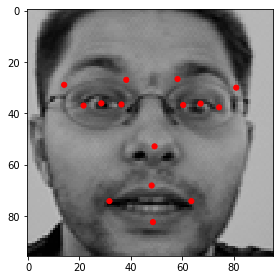

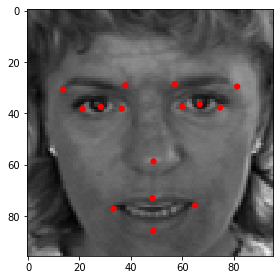

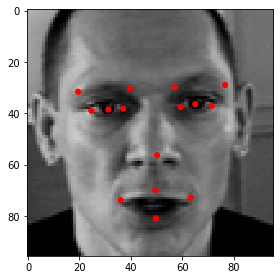

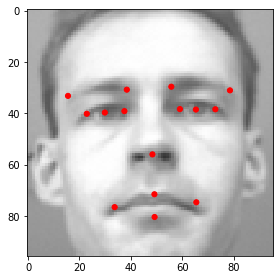

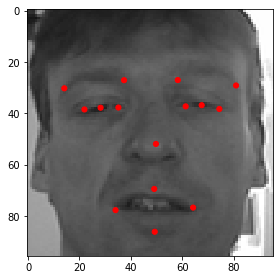

In [46]:
pred3 = model3.predict(X_test)
fig = plt.figure(figsize=(20,16))
for i in range(5):
    visualize_points(X_test[i], pred3[i])
plt.show()

# LIVE CAM TEST

## - Video stream function




In [47]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label):
  data = eval_js('stream_frame("{}")'.format(label))
  return data


def js_to_image(js_reply):
    """
    Params:
            js_reply: JavaScript object containing image from webcam
    Returns:
            img: OpenCV BGR image
    """
    # decode base64 image
    image_bytes = b64decode(js_reply.split(',')[1])
    # convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

## - Detecting face, putting filter

<IPython.core.display.Javascript object>

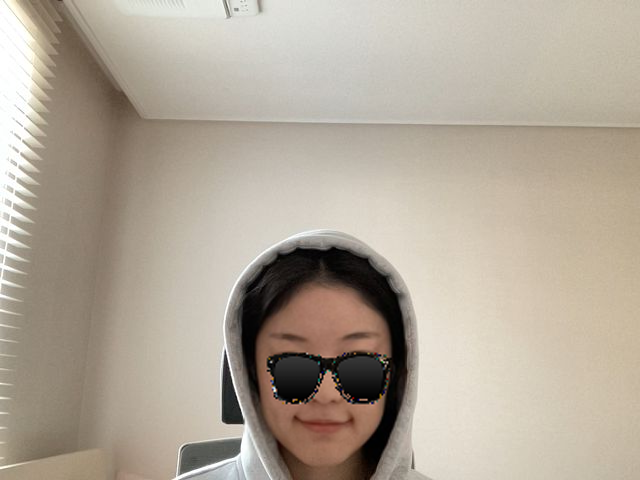

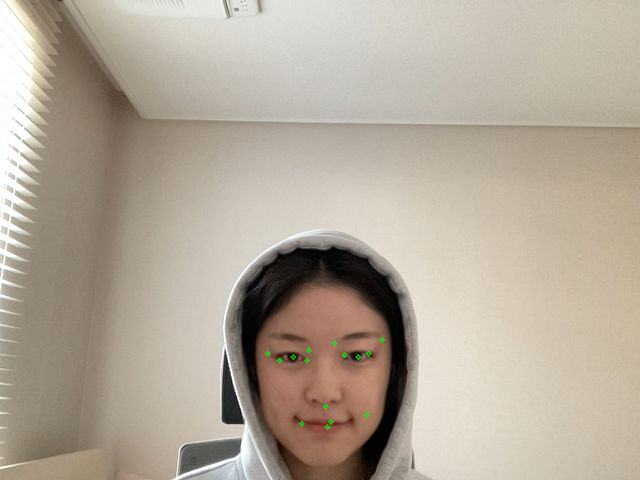

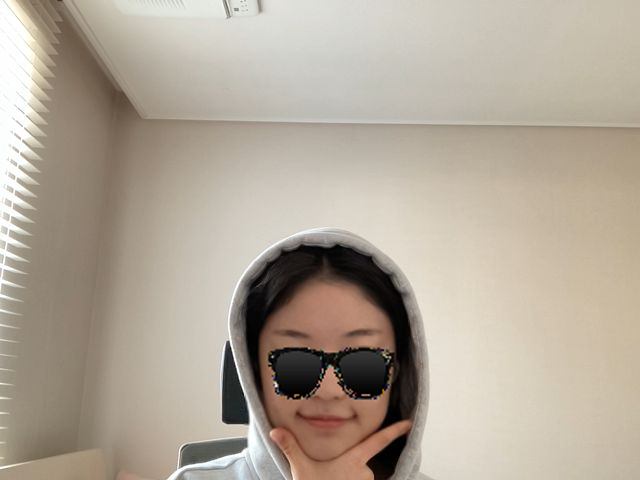

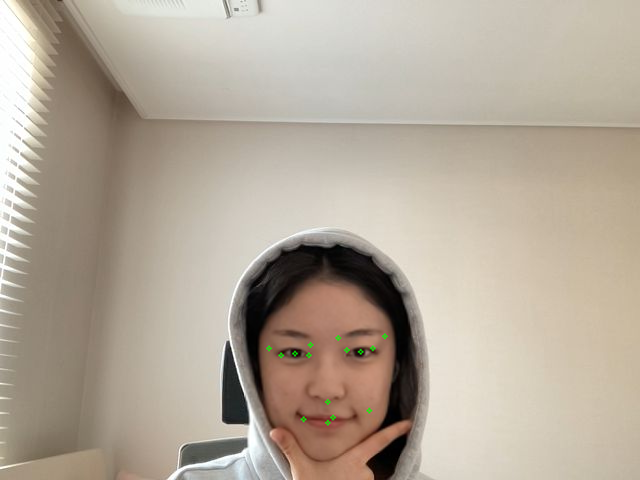

In [49]:
# Face cascade to detect faces
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# Define the upper and lower boundaries for a color to be considered "Blue"
blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])

# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Define filters
filters = ['/content/sunglasses.png', '/content/sunglasses_2.png', '/content/sunglasses_3.jpeg', '/content/sunglasses_4.png', '/content/sunglasses_5.jpeg', '/content/sunglasses_6.png']
filterIndex = 0

# start streaming video from webcam = load the video
video_stream()
# label for video
label_html = 'Capturing...'


# Keep reading the input
while True:
    # YOUTUBE   js_reply => frame
    '''DETECT FACES IN THE INPUT'''
    frame = video_frame(label_html)  # returns dict
    if not frame:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(frame["img"])
    frame = cv2.flip(frame, 1)
    frame2 = np.copy(frame)

    # Convert to HSV and GRAY for convenience
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using the haar casacade object
    faces = face_cascade.detectMultiScale(gray, 1.25, 6)



    '''DETECT FACIAL KEYPOINTS USING THE MODEL'''
    # Loop over all the faces found in the frame
    for (x, y, w, h) in faces:

        # Grab the face, make the faces ready for the model(normailze, resize, etc)
        gray_face = gray[y:y+h, x:x+w]
        color_face = frame[y:y+h, x:x+w]

        # Normalize to match the input format of the model - Range of pixel to [0, 1]
        gray_normalized = gray_face / 255

        # Resize it to 96x96 to match the input format of the model
        original_shape = gray_face.shape # A Copy for future reference
        face_resized = cv2.resize(gray_normalized, (96, 96), interpolation = cv2.INTER_AREA)
        face_resized_copy = face_resized.copy()
        face_resized = face_resized.reshape(1, 96, 96, 1)

        # Predicting the keypoints using the model
        keypoints = model3.predict(face_resized)

        # De-Normalize the keypoints values
        keypoints = keypoints * 48 + 48

        # Map the Keypoints back to the original image
        face_resized_color = cv2.resize(color_face, (96, 96), interpolation = cv2.INTER_AREA)
        face_resized_color2 = np.copy(face_resized_color)

        # Pair the keypoints together (x1, y1)
        points = []
        for i, co in enumerate(keypoints[0][0::2]):
            points.append((co, keypoints[0][1::2][i]))

        '''PUT SHADES ON THE FACES USING THE FACIAL KEYPOINTS'''
        # Add FILTER to the frame
        sunglasses = cv2.imread(filters[filterIndex], cv2.IMREAD_UNCHANGED)
        sunglass_width = int((points[7][0]-points[9][0])*1.1)
        sunglass_height = int((points[10][1]-points[8][1])/1.1)
        sunglass_resized = cv2.resize(sunglasses, (sunglass_width, sunglass_height), interpolation = cv2.INTER_CUBIC)
        transparent_region = sunglass_resized[:,:,:3] != 0
        face_resized_color[int(points[9][1]):int(points[9][1])+sunglass_height, int(points[9][0]):int(points[9][0])+sunglass_width,:][transparent_region] = sunglass_resized[:,:,:3][transparent_region]

        # Resize the face_resized_color image(=face with shades) back to its original shape
        frame[y:y+h, x:x+w] = cv2.resize(face_resized_color, original_shape, interpolation = cv2.INTER_CUBIC)

        # Add KEYPOINTS to the frame2
        for keypoint in points:
            cv2.circle(face_resized_color2, keypoint, 1, (0,255,0), 1)

        # Map the face with keypoints back to the original image(a separate one)
        frame2[y:y+h, x:x+w] = cv2.resize(face_resized_color2, original_shape, interpolation = cv2.INTER_CUBIC)

        # Show the frame and the frame2
        #cv2_imshow("Selfie Filters", frame)
        cv2_imshow(frame)
        #cv2_imshow("Facial Keypoints", frame2)
        cv2_imshow(frame2)
    # If the 'q' key is pressed, stop the loop
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break